In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Setup Complete")

Setup Complete


In [2]:
#Importing the data base 
proposerloan_filepath = "../input/prosper-loan/prosperLoanData.csv"
df = pd.read_csv(proposerloan_filepath)
np.random.seed(0) 
print("Loding data Complete")

Loding data Complete


In [3]:
print(df.head())


                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18             

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#descriptive stats of the dataframe
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

# Replacing NAN variables with 0

In [7]:
df=df.fillna(0)

# Let's try to simplify the loan status feature variables : Predict variable (desired target)

In [8]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [9]:
# those are current, completed and cancelled are categorize as completed (1)otherwise defaulted(0)
df['LoanStatus'] = np.where((df['LoanStatus'] == 'Current')|(df['LoanStatus'] == 'Completed')|(df['LoanStatus'] == 'Cancelled'), 
                         1, 0)

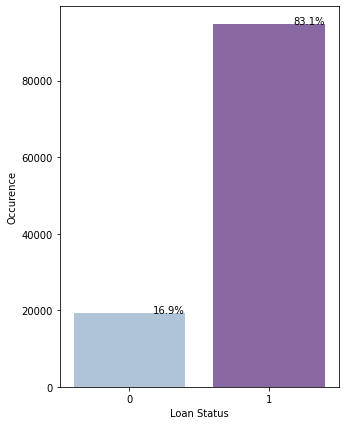

In [10]:
plt.figure(figsize=(5,7))
#ploting 
ax=sns.countplot(x='LoanStatus', data=df, palette='BuPu' )
plt.xlabel('Loan Status')
plt.ylabel('Occurence')
#annotating the percentage
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

# Extracting X and Y datasets

In [11]:
#extracting x and y from dataframe
cells=['ListingNumber','LoanStatus','ListingKey','CreditGrade','ListingCreationDate','ClosedDate'
,'ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','GroupKey'
,'DateCreditPulled','FirstRecordedCreditLine','IncomeRange','LoanKey','LoanOriginationDate'
,'LoanOriginationQuarter','MemberKey' ]
x=df.drop(columns=cells, axis=1)
y=df['LoanStatus']
print(y.value_counts(normalize=True)*100)
print(y.value_counts(normalize=True)*100)

1    83.076613
0    16.923387
Name: LoanStatus, dtype: float64
1    83.076613
0    16.923387
Name: LoanStatus, dtype: float64


# Splitting the data to train and test

In [12]:
#spliting data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)
print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

(113937, 63) (91149, 63) (22788, 63)
(113937,) (91149,) (22788,)
1    83.077159
0    16.922841
Name: LoanStatus, dtype: float64
1    83.074425
0    16.925575
Name: LoanStatus, dtype: float64


In [13]:
# Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [14]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print("\n",log_reg.intercept_)

[[ 4.22452642e-04  1.57320042e-07  2.64628800e-07  1.99629247e-07
  -1.64255964e-06 -8.73881889e-07 -5.73800562e-07  2.06844673e-06
  -2.94738809e-06 -2.88828615e-05  8.37868933e-05  1.35896134e-06
   4.27870827e-06  4.10122610e-03  4.22874548e-03  1.37784681e-05
   1.20167441e-05  9.13838198e-05  4.03187082e-05  1.13128101e-03
   3.54212743e-06  2.03747735e-05  6.05245421e-06 -6.32392397e-06
   1.81118865e-05  6.43750618e-07 -7.77427461e-08 -7.41171424e-06
   1.03003940e-06 -9.92172426e-06  1.25901214e-06  1.18500793e-06
  -6.00925994e-06  2.30291224e-06  7.67880863e-06 -1.93175413e-06
  -2.05617496e-07 -1.27406002e-06  8.63978193e-06 -9.08861024e-06
  -8.33989878e-07 -8.90916883e-06 -4.13986257e-05  1.10824659e-04
  -1.56188658e-02 -3.81059139e-04  8.63354217e-04 -2.40918014e-05
   1.06910412e-04 -1.28243402e-03 -2.14884975e-04  4.41680551e-04
  -6.56565526e-04  8.16459367e-05  3.44385712e-03 -3.57214268e-02
  -3.33348052e-02 -1.63911041e-03  7.33714411e-06  1.32672068e-06
   7.58620

# Performing prediction using the test dataset

In [15]:
y_pred=log_reg.predict(x_test)


In [16]:
test_score=log_reg.score(x_test,y_test)
print(test_score)

0.9800333508864315


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3857
           1       0.98      1.00      0.99     18931

    accuracy                           0.98     22788
   macro avg       0.99      0.94      0.96     22788
weighted avg       0.98      0.98      0.98     22788



# Display the confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)

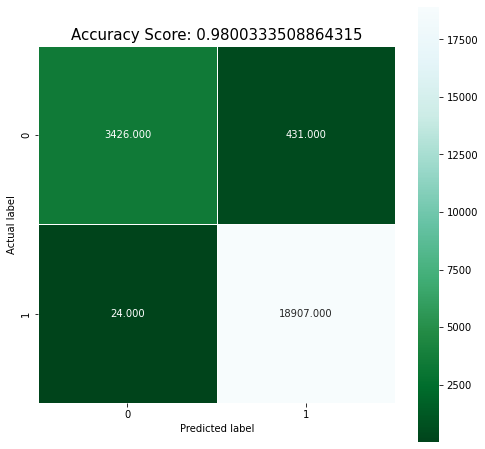

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuGn_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_score)
plt.title(all_sample_title, size = 15);